# We will learn using the breast cancer dataset

1. Relationship Between Variables
2. Correlation
3. Covariance
4. Pearson Correlation
5. Spearman's Rank Correlation
6. Mean VS Median
7. Hypothesis Testing
8. Normal(Gaussian) Distribution and z-score

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
# Import the dataset
import pandas as pd
data = pd.read_csv("breast_cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [6]:
# quick look to data
data.head()
data.shape # (569, 31)
data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Covariance
Covariance is measure of the tendency of two variables to vary together

So covariance is maximized if two vectors are identical

Covariance is zero if they are orthogonal.

Covariance is negative if they point in opposite direction

Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se

In [7]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension se:  -0.0003976248576440629


# Z-Score and outlier detection

In [20]:
out=[]
def Zscore_outlier(data):
    m = np.mean(data)
    sd = np.std(data)
    for i in data: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)

Zscore_outlier(data['compactness_worst'])



Outliers: [0.8663, 1.058, 0.7725, 0.7444, 0.7394, 0.7584, 0.9327, 0.9379, 0.7917, 0.8681]


# Pearson Correlation
Division of covariance by standart deviation of variables
Lets look at pearson correlation between radius mean and area mean

First lets use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :)

p1 and p2 is the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))

As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution
Also pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.
To be more clear what we did at correlation part and pearson correlation part is same.

In [8]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566132


# Spearman's Rank Correlation
Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
To compute spearman's correlation we need to compute rank of each value

In [9]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


Spearman's correlation is little higher than pearson correlation
If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship

Pearson correlation can be affected by outliers. 

Spearman's correlation is more robust.

# Hypothesis Testing
## Hypothesis Testing
 ## Classical Hypothesis Testing

We want to answer this question: "given a sample and a apparent effecti what is the probability of seeing such an effect by chance"

The first step is to quantify the size of the apparent effect by choosing a test statistic. Natural choice for the test statistic is the difference in means between two groups.

The second step is to define null hypothesis that is model of the system based on the assumption that the apparent effect is not real. 

A null hypothesis is a type of hypothesis used in statistics that proposes that no statistical significance exists in a set of given observations. The null hypothesis is a hypothesis which people tries to disprove it. Alternative hypothesis is a hypothesis which people want to tries to prove it.

Third step is compute p-value that is probablity of seeing the apparent effect if the null hypothesis is true. Suppose we have null hypothesis test. Then we calculate p value. If p value is less than or equal to a threshold, we reject null hypothesis.

If the p-value is low, the effect is said to be statistacally significant that means that it is unlikely to have occured by chance. 

Therefore we can say that the effect is more likely to appear in the larger population.
 ## Lets have an example. 

Null hypothesis: world is flatten. Alternative hypothesis: world is round. Several scientists set out to disprove the null hypothesis. 

This eventually led to the refection of the null hypothesis and acceptance of the alternative hypothesis.

Other example. "this effect is real" this is null hypothesis. Based on that assumption we compute the probability of the apparent effect. That is the p-value. 

If p-value is low, we conclude that null hypothesis is unlikely to be true.

Now lets make our example:
I want to learn that are radius mean and area mean related with each other?

 My null hypothesis is that "relationship between radius mean and area mean is zero in tumor population'.

Now we need to refute this null hypothesis in order to demonstrate that radius mean and area mean are related.

(actually we know it from our previous experiences)
lets find p-value (probability value)

In [10]:
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


## **P values is almost zero so we can reject null hypothesis.**

Scipy stats module

https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests

# DATA Normalization and scaling

Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.
1. Scalling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation
* These techniques convert values in the dataset to smaller values.
* If the data has to many extreme values or skewed, this method helps to make your data normal.
* But These technique not always give you the best results.
* There is no lose of data from these methods.
* In all these method boxcox transformation gives the best result.

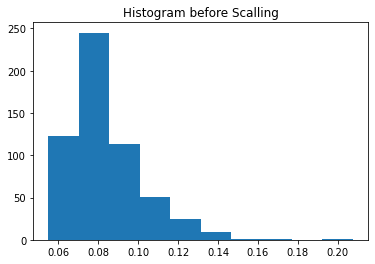

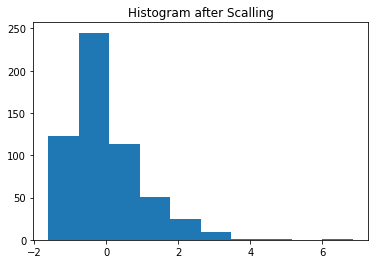

In [22]:
from sklearn import preprocessing
plt.hist(data['fractal_dimension_worst'])
plt.title("Histogram before Scalling")
plt.show()
scaler = preprocessing.StandardScaler()
data['fractal_dimension_worst'] = scaler.fit_transform(data['fractal_dimension_worst'].values.reshape(-1,1))
plt.hist(data['fractal_dimension_worst'])
plt.title("Histogram after Scalling")
plt.show()

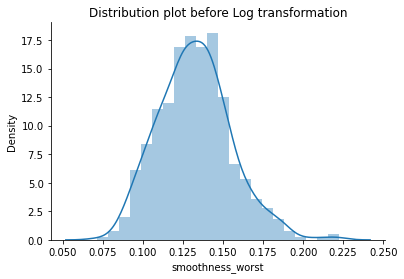

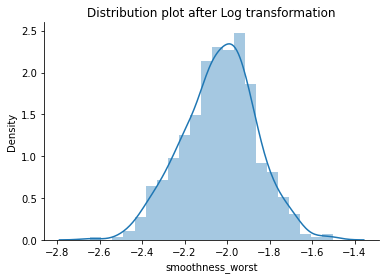

In [23]:
#Log Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.distplot(data['smoothness_worst'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
data['smoothness_worst'] = np.log(data['smoothness_worst'])
sns.distplot(data['smoothness_worst'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

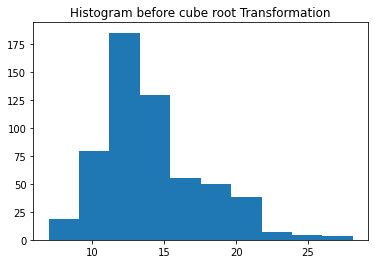

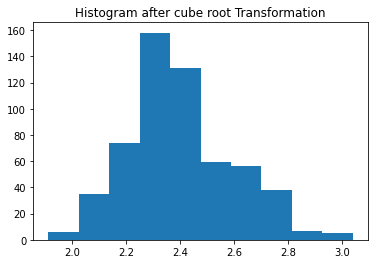

In [25]:
#cube root Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.hist(data['radius_mean'])
plt.title("Histogram before cube root Transformation")
plt.show()
data['radius_mean'] = (data['radius_mean']**(1/3))
plt.hist(data['radius_mean'])
plt.title("Histogram after cube root Transformation")
plt.show()

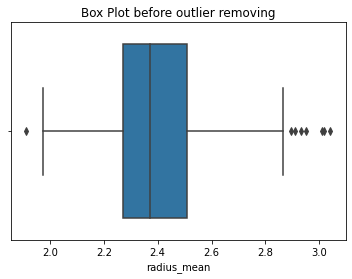

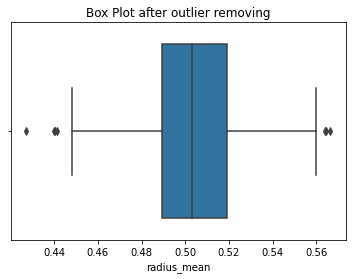

In [26]:
#Box-transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
sns.boxplot(data['radius_mean'])
plt.title("Box Plot before outlier removing")
plt.show()
data['radius_mean'],fitted_lambda= scipy.stats.boxcox(data['radius_mean'] ,lmbda=None)
sns.boxplot(data['radius_mean'])
plt.title("Box Plot after outlier removing")
plt.show()